In [1]:
import math
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
b = widgets.FloatSlider(value=0.3,min=0.15,max=0.6,step=0.025,description='b (m):',readout_format='.3f')
d = widgets.FloatSlider(value=0.5,min=0.20,max=1.0,step=0.025,description='d (m):',readout_format='.3f')
fck = widgets.FloatSlider(value=20,min=20,max=50,step=5,description='fck (MPa):')
fck2 = widgets.Dropdown(
    options=[('C20/25', 20.0), ('C25/30', 25.0), ('C30/37', 30.0), ('C35/45', 35.0), ('C40/50', 40.0), ('C45/55', 45.0), ('C50/60', 50.0)],
    value=20,
    description='Betão:',
)
fyk = widgets.FloatSlider(value=400,min=400,max=500,step=100,description='fyk (MPa):')
fyk2 = widgets.Dropdown(
    options=[('A400', 400.0), ('A500', 500.0)],
    value=400,
    description='Aço:',
)
med = widgets.FloatSlider(value=100,min=1,max=1000,step=1,description='Med (kNm):',readout_format='.0f')
tab1 = VBox(children=[b,d,med,fck2,fyk2])

In [3]:
@interact(b=b, d=d, med=med, fck=fck2, fyk=fyk2)
def plot(b=0.3, d=0.5, med=100.0, fck=20.0, fyk=400.0):
    fcd = fck/1.5
    fyd = fyk/1.15
    mmed = med
    bb = b
    dd = d
    miu = mmed/bb/d**2/fcd/1000.0
    try:
        omega = 1.0-math.sqrt(1-2*miu)
    except:
        omega = math.nan
    alpha = 1.25*omega
    ast = omega*b*d*fcd/fyd * 10000.0
    epss = (1.0-alpha)*3.5/alpha
    rho = omega*fcd/fyd*100.0
    print("miu={:.3f} omega={:.3f} x/d={:.3f} eps-s={:.3f} As={:.2f} cm2 rho(%)={:.2f}".format(miu, round(omega,3), alpha, epss, ast, rho))

interactive(children=(FloatSlider(value=0.3, description='b (m):', max=0.6, min=0.15, readout_format='.3f', st…

## Comparação diagrama parábola-retângulo vs. diagrama retangular (em %)

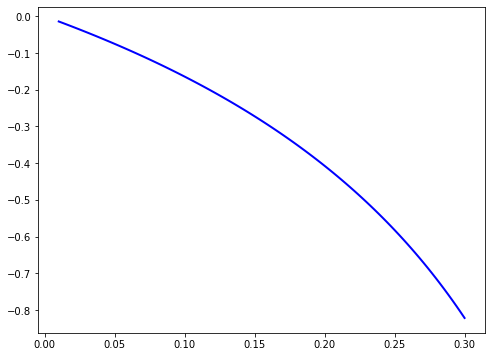

In [4]:
n = 100
t = np.linspace(0.01, 0.3, n)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
om = ((1.0-0.973)*np.ones(n)-np.sqrt(np.ones(n)-2*t)+np.sqrt(0.973*0.973*np.ones(n)-0.973*2*t))/(np.ones(n)-np.sqrt(np.ones(n)-2*t))*100
ax.plot(t, om, lw=2.0, color='blue')

## Vigas

In [5]:
widgets.interact(plot, b=b, d=d, med=med, fck=fck2, fyk=fyk2)

interactive(children=(FloatSlider(value=0.3, description='b (m):', max=0.6, min=0.15, readout_format='.3f', st…

<function __main__.plot(b=0.3, d=0.5, med=100.0, fck=20.0, fyk=400.0)>